In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("archive/Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
#check null values
df.isnull().sum() 

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
##extracurricular[yes or no] --> change to 1 or 0
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if(x == 'Yes') else 0)

In [6]:
##visualization
matrixcorr = df.corr()

<Axes: >

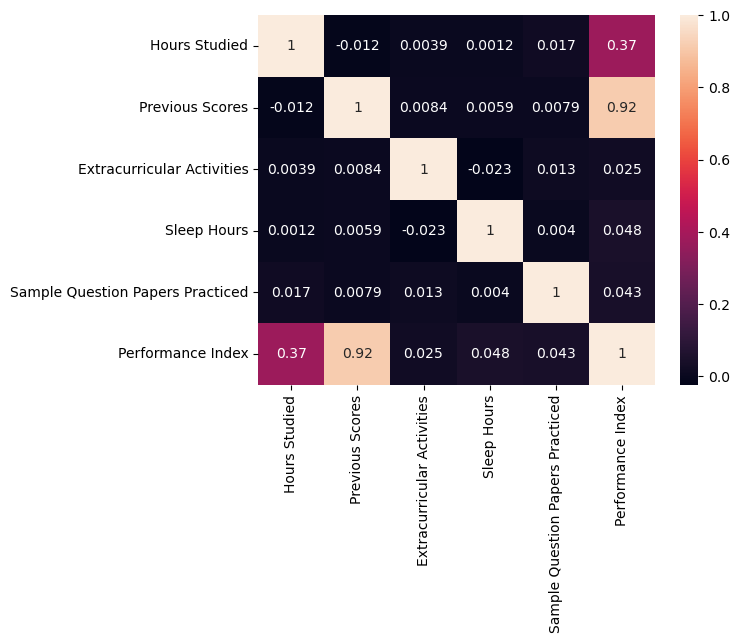

In [7]:
sns.heatmap(matrixcorr, annot = True)

In [8]:
##hours studied and previous scores seems to have corr with perfomance**

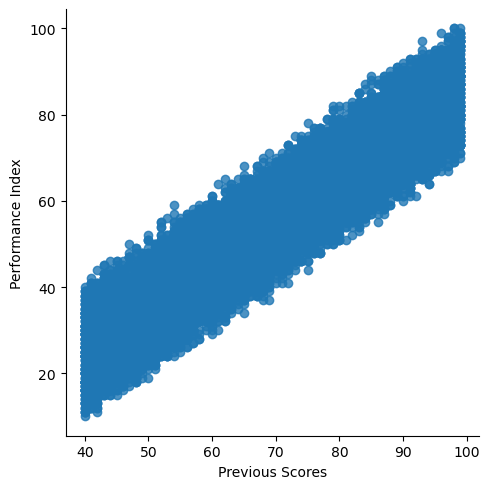

In [9]:
sns.lmplot(data = df,x = 'Previous Scores', y = 'Performance Index')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

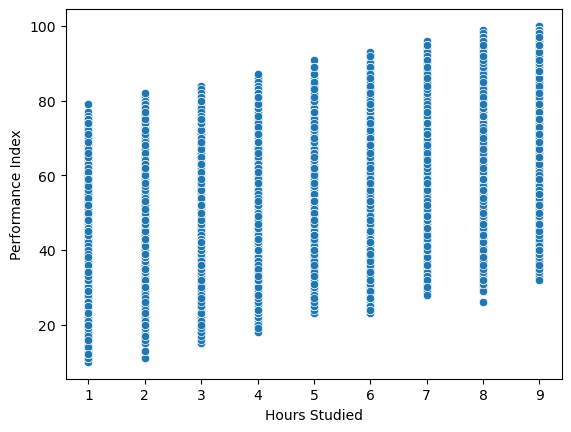

In [10]:
sns.scatterplot(x = df['Hours Studied'], y = df['Performance Index'])

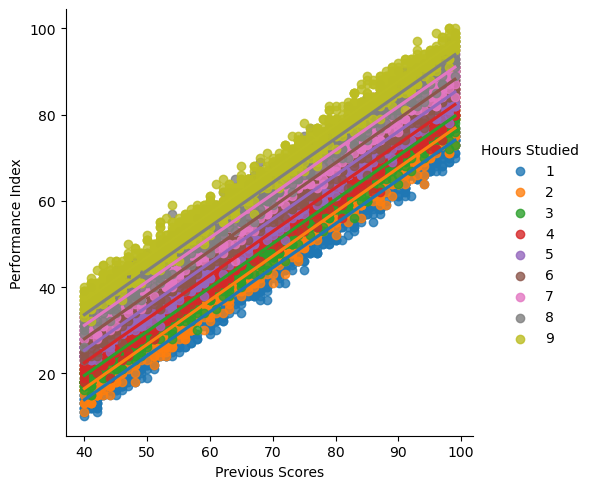

In [11]:
sns.lmplot(data = df,x = 'Previous Scores', y = 'Performance Index', hue = 'Hours Studied')

In [12]:
#performance index appears to be a combination of with Hours Studied and Previous Scores

In [13]:
y = df['Performance Index']
X = df[['Previous Scores','Hours Studied']]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model = model.fit(X = X_train,y = y_train)

In [18]:
predict = model.predict(X_test)

<Axes: >

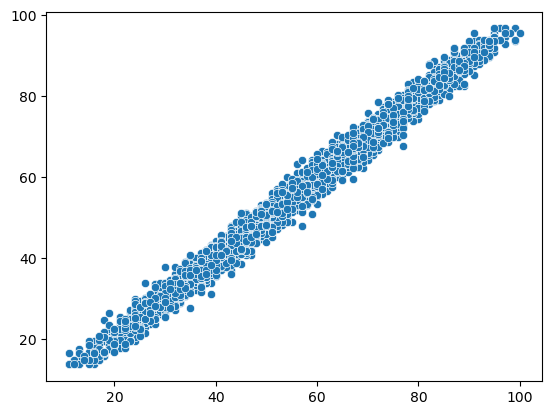

In [19]:
sns.scatterplot(x = y_test.values, y = predict) ##seems very accurate

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
erromedio = mean_absolute_error(y_true=y_test.values,y_pred=predict)
erromedio

1.797193394861737

**Erromedio** = 1.797193394861737

using linear Regression the
model is very precise with mean_absolute_error of 1.8 
**using only two variable Previous Scores and Hours Studied**